In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Data frame functions/methods

In [2]:
bank_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Documents\NareshIT\DataScience\DataFiles\bank-additional.csv")
bank_df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [3]:
bank_df[['age','job','marital']]

,age,job,marital
0,30,blue-collar,married
1,39,services,single
2,25,services,married
3,38,services,married
4,47,admin.,married
...,...,...,...
4114,30,admin.,married
4115,39,admin.,married
4116,27,student,single
4117,58,admin.,married


In [4]:
#bank_df[zip('age','job','marital')] # if they are seprate list we can zip to combine into on data otherwise we'll get error

In [5]:
bank_df.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [6]:
bank_df.shape

(4119, 21)

In [7]:
bank_df.size

86499

In [8]:
bank_df.columns
# type(bank_df.columns)
# pandas.core.indexes.base.Index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
bank_df.dtypes
# type(bank_df.dtypes)
# pandas.core.series.Series

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
# create two seperate lists of categorical columns and numerical columns

d1 = dict(bank_df.dtypes)
d1

{'age': dtype('int64'),
 'job': dtype('O'),
 'marital': dtype('O'),
 'education': dtype('O'),
 'default': dtype('O'),
 'housing': dtype('O'),
 'loan': dtype('O'),
 'contact': dtype('O'),
 'month': dtype('O'),
 'day_of_week': dtype('O'),
 'duration': dtype('int64'),
 'campaign': dtype('int64'),
 'pdays': dtype('int64'),
 'previous': dtype('int64'),
 'poutcome': dtype('O'),
 'emp.var.rate': dtype('float64'),
 'cons.price.idx': dtype('float64'),
 'cons.conf.idx': dtype('float64'),
 'euribor3m': dtype('float64'),
 'nr.employed': dtype('float64'),
 'y': dtype('O')}

In [11]:
cat, num = [], []
for i,j in d1.items():
    if j == 'object':
        cat.append(i)
    else:
        num.append(i)

cat, num

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'])

In [12]:
cat = [i for i in d1 if d1[i] == 'object']
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [13]:
num = [i for i in d1 if d1[i] != 'object']
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [14]:
nume = bank_df.select_dtypes(exclude='object')
cate = bank_df.select_dtypes(include='object')
#nume, cate

In [15]:
nume

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [16]:
cate

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [17]:
bank_df.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
bank_df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [20]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [21]:
bank_df.take([1], axis =1)

,job
0,blue-collar
1,services
2,services
3,services
4,admin.
...,...
4114,admin.
4115,admin.
4116,student
4117,admin.


In [22]:
bank_df.take([1,2,3], axis=1)

,job,marital,education
0,blue-collar,married,basic.9y
1,services,single,high.school
2,services,married,high.school
3,services,married,basic.9y
4,admin.,married,university.degree
...,...,...,...
4114,admin.,married,basic.6y
4115,admin.,married,high.school
4116,student,single,high.school
4117,admin.,married,high.school


In [23]:
bank_df.iloc[[100,140,190],[2,6,9]]

,marital,loan,day_of_week
100,married,yes,fri
140,divorced,yes,tue
190,single,no,wed


In [24]:
bank_df.iloc[150:250,[2,6,10]]

,marital,loan,duration
150,married,no,279
151,married,no,113
152,married,no,246
153,single,no,309
154,single,no,168
...,...,...,...
245,divorced,no,219
246,single,no,267
247,married,no,406
248,married,yes,151


In [25]:
bank_df.iloc[1] # if you provide only one [] you will get it as series

# type(bank_df.iloc[1])
# pandas.core.series.Series

age                        39
job                  services
marital                single
education         high.school
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               fri
duration                  346
campaign                    4
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.855
nr.employed            5191.0
y                          no
Name: 1, dtype: object

In [26]:
bank_df.iloc[[1]] # if you provide 2 [] you'll get as Dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [27]:
bank_df.iloc[:,1] # same here provide [] for column num to get Data frame

0       blue-collar
1          services
2          services
3          services
4            admin.
           ...     
4114         admin.
4115         admin.
4116        student
4117         admin.
4118     management
Name: job, Length: 4119, dtype: object

In [28]:
bank_df.iloc[:,[1]]

,job
0,blue-collar
1,services
2,services
3,services
4,admin.
...,...
4114,admin.
4115,admin.
4116,student
4117,admin.


In [29]:
bank_df.loc[100:200,['age','job']]

,age,job
100,37,management
101,58,admin.
102,37,services
103,38,admin.
104,33,services
...,...,...
196,50,blue-collar
197,41,technician
198,38,technician
199,32,student


## Cateorical Data Analysis

In [30]:
bank_df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [31]:
bank_df['job'].nunique()

12

In [32]:
jb_cnt = bank_df['job'] == 'admin'

In [33]:
len(jb_cnt)

4119

In [34]:
jobs = bank_df['job'].unique()
cnt = []
for job in jobs:
    cnt.append(len(bank_df[bank_df['job'] == job]))
    

In [35]:
j = pd.DataFrame(zip(list(jobs),cnt))
j

,0,1
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


In [36]:
jdf = pd.DataFrame([list(jobs),cnt], index=['jobs','count']).T

In [37]:
jdf

,jobs,count
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


In [38]:
jdf1 = bank_df['job'].value_counts()
jdf1

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

In [39]:
pd.DataFrame(jdf1)

,count
job,
admin.,1012
blue-collar,884
technician,691
services,393
management,324
retired,166
self-employed,159
entrepreneur,148
unemployed,111


### plotting bar chart and pie chart

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

**Frequency plot**

#### bar plot using Matplotlib, it needs 2 columns

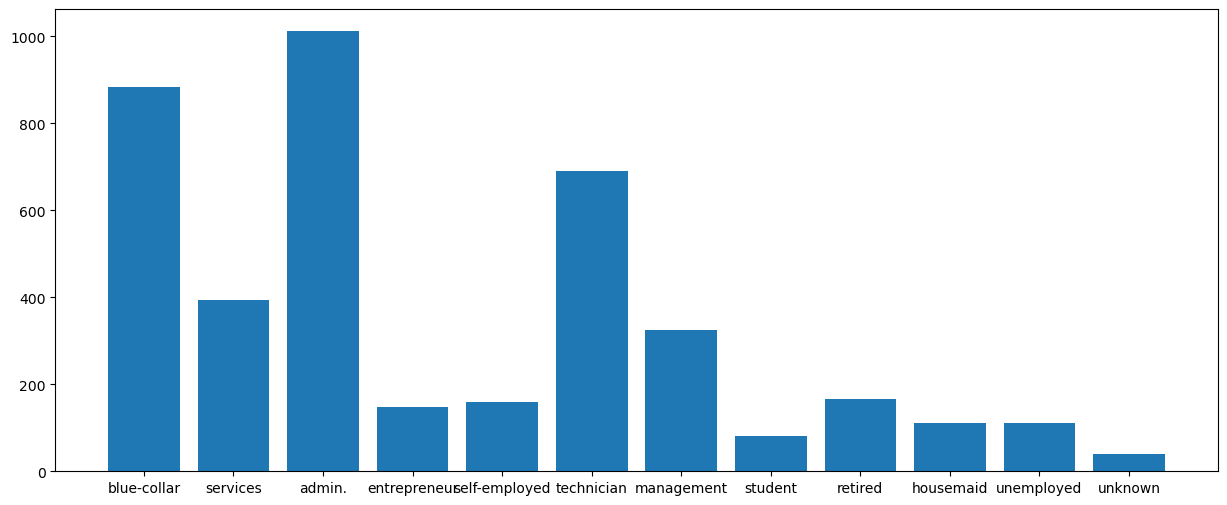

In [41]:
plt.figure(figsize=(15,6))
plt.bar('jobs','count',data=jdf)
plt.show()

#### bar plot from seaborn, it just need main dataframe and column name

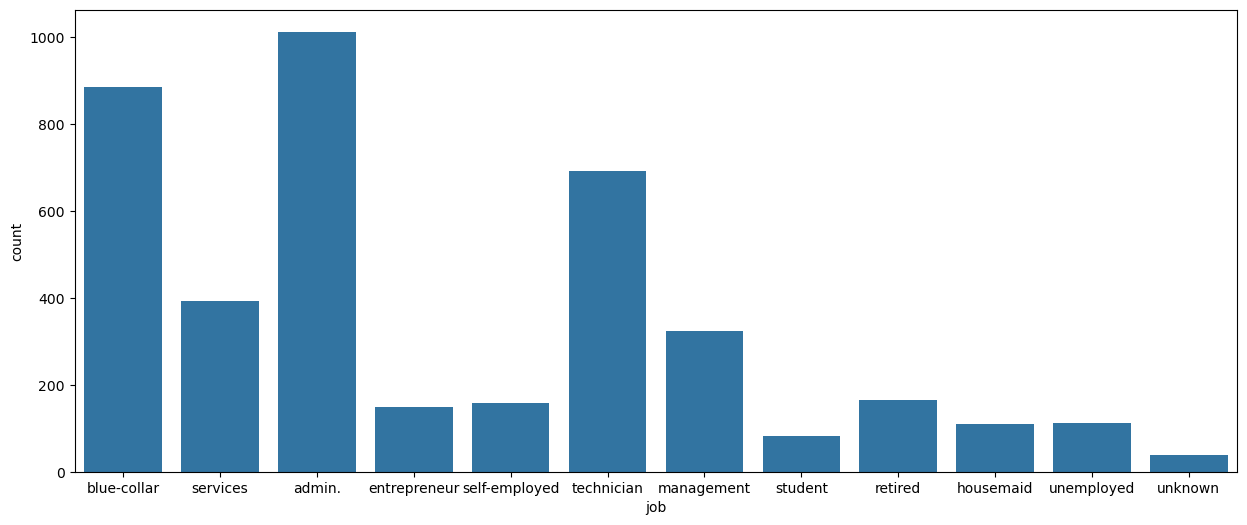

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(data=bank_df,x = 'job')
plt.show()

#### Bar plot directly from value counts

[Text(0, 0, '1012'),
 Text(0, 0, '884'),
 Text(0, 0, '691'),
 Text(0, 0, '393'),
 Text(0, 0, '324'),
 Text(0, 0, '166'),
 Text(0, 0, '159'),
 Text(0, 0, '148'),
 Text(0, 0, '111'),
 Text(0, 0, '110'),
 Text(0, 0, '82'),
 Text(0, 0, '39')]

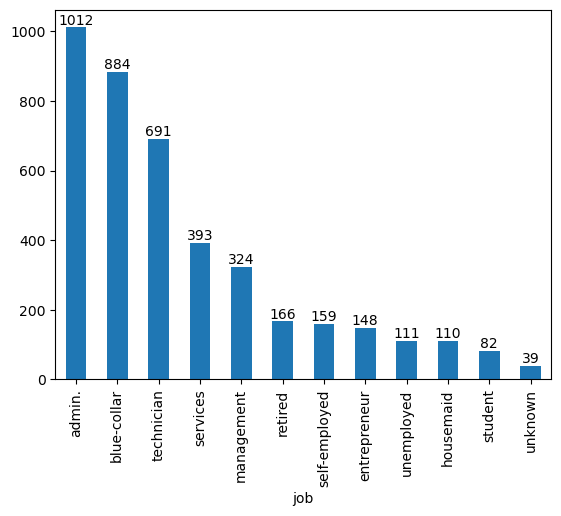

In [43]:
jdf1 = bank_df['job'].value_counts()
ax = jdf1.plot(kind = 'bar')
ax.bar_label(ax.containers[0])

### Relative frequency

In [44]:
bank_df['job'].value_counts(normalize=True)

job
admin.           0.245691
blue-collar      0.214615
technician       0.167759
services         0.095412
management       0.078660
retired          0.040301
self-employed    0.038602
entrepreneur     0.035931
unemployed       0.026948
housemaid        0.026706
student          0.019908
unknown          0.009468
Name: proportion, dtype: float64

In [47]:
keys = bank_df['job'].value_counts().keys()
values = bank_df['job'].value_counts().values

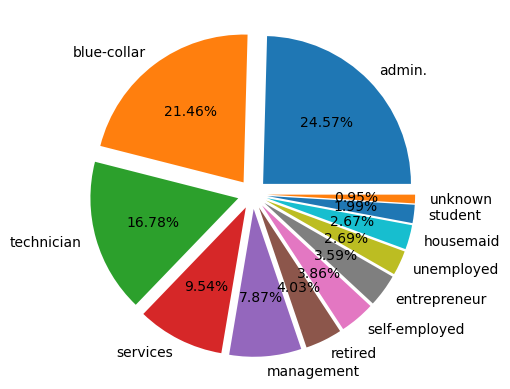

In [52]:
plt.pie(x=values, explode=[0.1]*len(values),labels=keys,autopct="%0.02f%%")
plt.show()

## Numerical Analysis

In [53]:
bank_df.select_dtypes(exclude='object').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [64]:
# age
l =[]
cnt = len(bank_df['age'])
maxx = bank_df['age'].max()
minn = bank_df['age'].min()
mean = bank_df['age'].mean()
median = bank_df['age'].median()
std = bank_df['age'].std()
p25 = round(np.percentile(bank_df['age'], 25),2)
p50 = round(np.percentile(bank_df['age'], 50),2)
p75 = round(np.percentile(bank_df['age'], 75),2)
l = [cnt, maxx,minn,mean,median,std,p25,p50,p75]
i = ['cnt', 'maxx','minn','mean','median','std','p25','p50','p75']


In [67]:
d = pd.DataFrame(data=l,index=i,columns=['age'])

In [68]:
d

,age
cnt,4119.000000
maxx,88.000000
minn,18.000000
mean,40.113620
median,38.000000
std,10.313362
p25,32.000000
p50,38.000000
p75,47.000000


In [93]:
cols = bank_df.select_dtypes(exclude='object').columns
lst = []
for col in cols:
    cnt = len(bank_df[col])
    maxx = bank_df[col].max()
    minn = bank_df[col].min()
    mean = bank_df[col].mean()
    median = bank_df[col].median()
    std = bank_df[col].std()
    p25 = round(np.percentile(bank_df[col], 25),2)
    p50 = round(np.percentile(bank_df[col], 50),2)
    p75 = round(np.percentile(bank_df[col], 75),2)
    lst.append([cnt, maxx,minn,mean,median,std,p25,p50,p75])
    
lst
i = ['cnt', 'maxx','minn','mean','median','std','p25','p50','p75']
d = pd.DataFrame(lst,columns=i).T
d

,0,1,2,3,4,5,6,7,8,9
cnt,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
maxx,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
minn,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
median,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
p25,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.080000,-42.700000,1.330000,5099.100000
p50,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.750000,-41.800000,4.860000,5191.000000
p75,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.990000,-36.400000,4.960000,5228.100000


In [83]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000
